In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
from pathlib import Path
import scipy

import setigen as stg

IMG_DIR = Path("../../docs/source/images/")

In [2]:
# Sometimes it can be necessary to re-run this command for plots to show automatically
%matplotlib inline

### Opening image
Also used in index.rst.

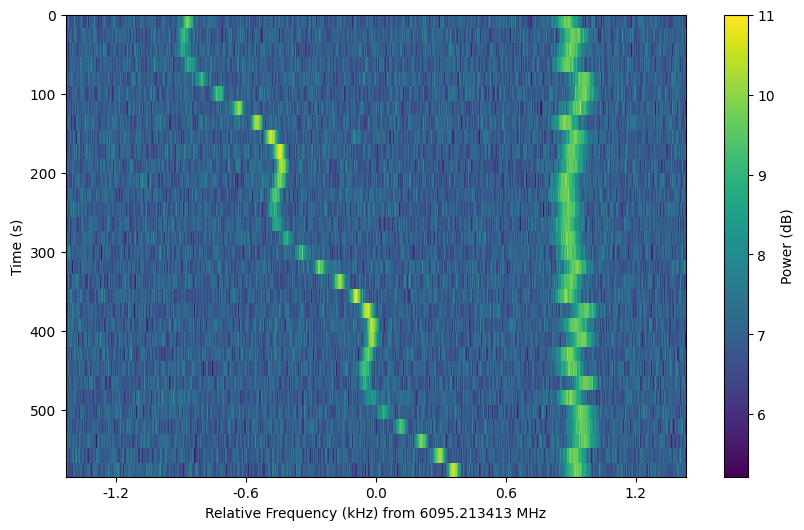

In [5]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=-2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)

noise = frame.add_noise(x_mean=5)

signal = frame.add_signal(stg.sine_path(f_start = frame.fs[200], drift_rate = 2*u.Hz/u.s,
                                    period = 20, amplitude = 100*u.Hz),
                          stg.sine_t_profile(period=20, 
                                             amplitude=frame.get_intensity(snr=25), 
                                             level=frame.get_intensity(snr=50)),
                          stg.sinc2_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.simple_rfi_path(f_start = frame.fs[840], drift_rate = 0*u.Hz/u.s,
                                    spread = 100*u.Hz),
                          stg.constant_t_profile(level=frame.get_intensity(snr=50)),
                          stg.gaussian_f_profile(width=80*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.plot()
plt.savefig(IMG_DIR / 'flashy_synthetic.png', bbox_inches='tight')
plt.show()

### Minimal Working Example

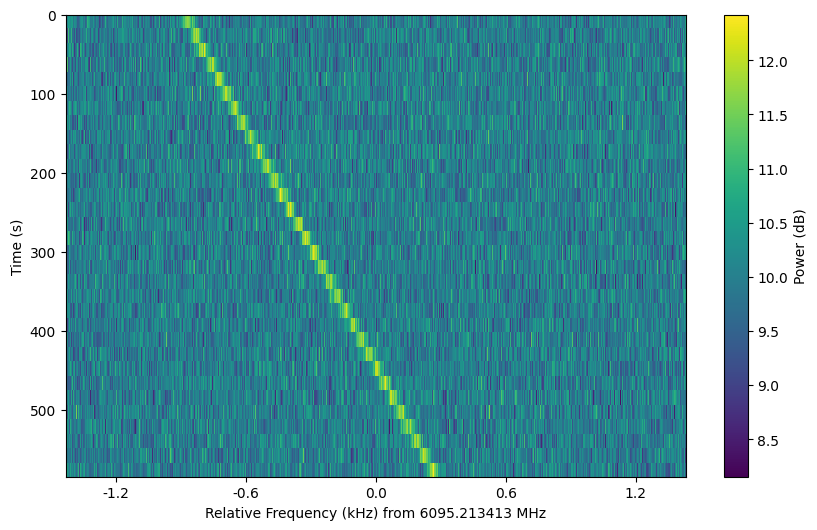

In [6]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=200),
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.gaussian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.plot()
plt.savefig(IMG_DIR / 'example.png', bbox_inches='tight')
plt.show()

Obs noise

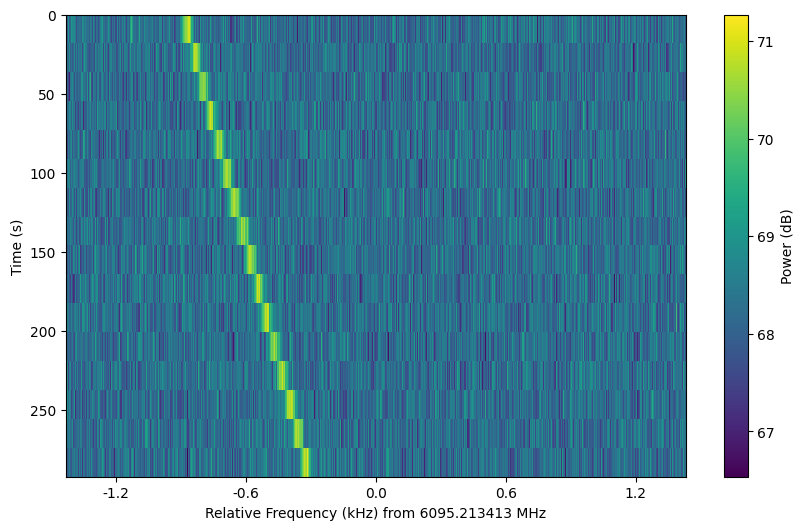

In [8]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=16*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise_from_obs()
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=200),
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.gaussian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.plot()
plt.savefig(IMG_DIR / 'example_obs.png', bbox_inches='tight')
plt.show()